<h2 style="color:#73C6B6;">Appendix</h2>

1. <a href=#imports >Imports</a>
2. <a href=#function>Function</a> 
3. <a href=#load>Load Data</a>        
4. <a href=#formating>Data Formating </a>         
5. <a href=#valid>Validate Assumption(Optional)</a>        
6. <a href=#EDA>Exploratory Data Analysis</a>
7. <a href=#baseline_model>Baseline Model</a>
8. <a href=#data_prep>Data Prep and Experimentation</a>
9. <a href=#conclusion>Conclusion</a>

<h2 style="color:#73C6B6;"> OverView</h2>

Income is money that a person or a business receives in return for working,
providing a product or service, or investing capital. A person
'
s income may
also derive from a pension, a government benefi

<h2 style="color:#73C6B6;">Problem Statment</h2>

building a model to predict whether an individual’s income will be greater
than $50,000 per year based on several attributes .Helping Governments for
income tax or any finance company .


<h2 style="color:#73C6B6;"> Data Description </h2> 

We will be using (income classification ) Dataset from Kaggle <a href=https://www.kaggle.com/lodetomasi1995/income-classification >here</a>

Interpretation: Rows = 32,561 | Cols = 15

<h2 style="color:#73C6B6;">Features </h2>

 ><p><b style="color:#148F77;">age:</b>  the age of an individual
                              <br > ●Integer greater than 0<p/>
><b><b style="color:#148F77 ;">workclass:</b> a general term to represent the employment status of an individual
                              <br >● Private, Self-emp-not-inc,, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.<p/>
><p><b style="color:#148F77 ;">fnlwgt:</b> : final weight. In other words, this is the number of people the census believes
the entry represents..<br >● Integer greater than 0<p/>
><p><b style="color:#148F77 ;">education:</b> the highest level of education achieved by an individual.
    <br >●Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th- 8th, 12th, Masters, 1st-4th,10th, Doctorate, 5th-6th, Preschool.<p/>
><p><b style="color:#148F77 ;">education-num:</b>  the highest level of education achieved in numerical form.
                  <br >●Integer greater than 0<p/>
><p><b style="color:#148F77 ;">marital-status:</b>marital status of an individual. Married-civ-spouse corresponds to a
civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. 
    <br >●Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<p/>
><p><b style="color:#148F77 ;">occupation:</b>  the general type of occupation of an individual.
<br >●Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <p/>
><p><b style="color:#148F77;">relationship:</b>represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has <br >one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all <br >●Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<p/>
><p><b style="color:#148F77;">race: </b> Descriptions of an individual’s race<br >● White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<p/>
><p><b style="color:#148F77;">sex:</b>: the biological sex of the individual.<br >● Female, Male.<p/>
><p><b style="color:#148F77;">capital-gain:</b> capital gains for an individual.<br >●Integer greater than or equal to 0<p/>  
><p><b style="color:#148F77;">capital-loss:</b> capital loss for an individual
<br >●Integer greater than or equal to 0<p/>  
><p><b style="color:#148F77;">hours-per-week:</b>: the hours an individual has reported to work per week.<br >● continuous.<p/>
><p><b style="color:#148F77;">native-country:</b>country of origin for an individual.<br >●United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece,<br > South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,<br > Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand,<br > Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<p/>  
><p><b style="color:#148F77;">income</b> whether or not an individual makes more than $50,000 annually.<br>●50K, <=50Kmore or less 50k/per year<p/>  

<h2 style="color:#73C6B6;">Tools </h2>

Numpy, Pandas, Seaborn, matplot, sklearn, xgboost, imblearn, mlxtend.

## <a name='imports' style="color:#73C6B6;">Libraries Imports</a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score ,roc_curve, classification_report 
from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score,plot_roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb


## <a name='function' style="color:#73C6B6;">Function</a> 

In [231]:
def model_eval(model,X_local,y_local,eval_name, beta=1):
    """function print Accuarcy ,Precision Recall and fbeta score
    """
    y_pred = model.predict(X_local)
    print(f"___________________{eval_name} Metrics________________")
    print ("Accuarcy score:",model.score(X_local,y_local))
    print ("Precision score",precision_score(y_local, y_pred))
    print ("Recall score",recall_score(y_local, y_pred))
    print (f"F{beta} score",fbeta_score(y_local, y_pred,beta=beta))

    
    
def make_confusion_matrix(model,X_local,y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion,  cmap="Blues" ,annot=True, square=True, fmt='d',
           xticklabels=['>50K', '<=50K'],
           yticklabels=['>50K', '<=50K']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    

def precision_recall_curve_plt(model,X_local,y_local):
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_local, model.predict_proba(X_local)[:,1] )

    plt.figure(dpi=80)
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.legend(loc='lower left')
    plt.xlabel('Threshold (above this probability, label as unSarvived)');
    plt.title('Precision and Recall Curves');
     

## <a name='load' style="color:#73C6B6;">Load Data</a> 

In [3]:
df = pd.read_csv('income_evaluation.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## <a name='formating' style="color:#73C6B6;">Data Formating </a> 

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
df.drop_duplicates(inplace=True)

## <a name='valid' style="color:#73C6B6;">Validate Assumption(Optional)</a>

In [9]:
df.columns=df.columns.str.replace(' ', '')

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
df.workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
for col in df.columns.to_list():
    df[col].replace(' ?', np.NaN, inplace=True)    

In [13]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [14]:
for col in df.columns.to_list():
    num_uniq = df[col].nunique()
    if num_uniq <= 10:
        uniq_list = df[col].unique()
    else:
        uniq_list = 'more than 10'
    print(col, ':', num_uniq, ',', uniq_list)

age : 73 , more than 10
workclass : 8 , [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt : 21648 , more than 10
education : 16 , more than 10
education-num : 16 , more than 10
marital-status : 7 , [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : 14 , more than 10
relationship : 6 , [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race : 5 , [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex : 2 , [' Male' ' Female']
capital-gain : 119 , more than 10
capital-loss : 92 , more than 10
hours-per-week : 94 , more than 10
native-country : 41 , more than 10
income : 2 , [' <=50K' ' >50K']


In [15]:
df.drop(["education-num"],axis="columns",inplace=True)

## <a name='EDA' style="color:#73C6B6;">Exploratory Data Analysis</a>

In [16]:
! pip install -U pandas-profiling
from pandas_profiling import ProfileReport
ProfileReport(df)

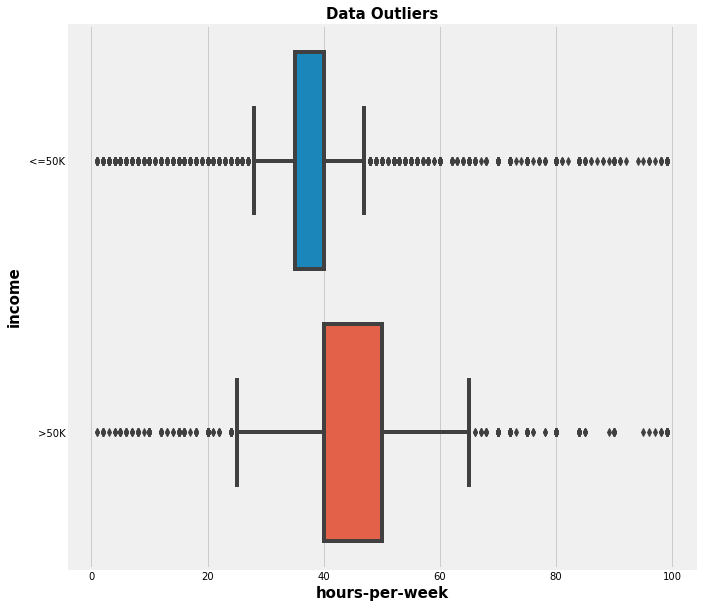

In [17]:
plt.figure(figsize=(10,10))

plt.title('Data Outliers',fontsize = 15,loc='center',weight='bold');
cb=sns.boxplot(data=df,y='income',x='hours-per-week')
cb.set_yticklabels(cb.get_yticklabels(),fontsize=10);
cb.set_xlabel('hours-per-week',fontsize=15,weight='bold')
cb.set_ylabel('income',fontsize=15,weight='bold');


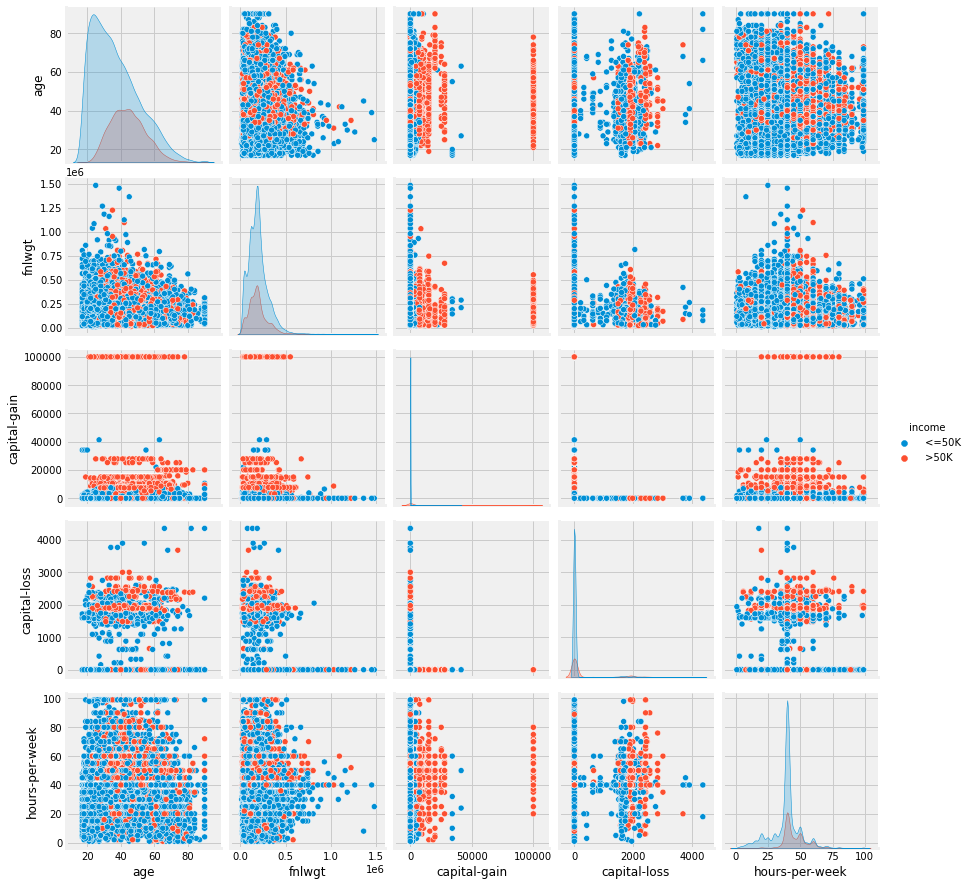

In [18]:
sns.pairplot(df, hue="income")

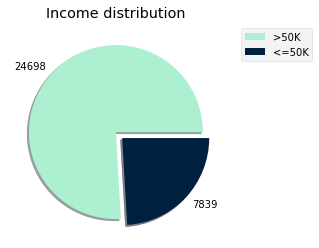

In [162]:
income = y.value_counts()
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=['>50K','<=50K'],bbox_to_anchor=(1.05, 1))

In [20]:
df['income'] = np.where(df['income'] == ' >50K', 1, 0).astype('int16')

In [21]:
X=df.drop("income",axis=1)
y=df[["income"]]

In [22]:
num_col=X.select_dtypes(include=np.number ).columns
num_col

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [23]:
cat_col=X.select_dtypes(exclude=np.number ).columns
cat_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
for df in [X_train, X_test]:
    df['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df['native-country'].fillna(X_train['native-country'].mode()[0], inplace=True)  

C:\Users\abdol\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
X=pd.get_dummies(X)
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <a name='baseline_model' style="color:#73C6B6;">Baseline Model</a>

In [117]:
#beseline LogisticRegression 
lg_b=LogisticRegression()
lg_b.fit(X_train[num_col],y_train)
model_eval(lg_b,X_train[num_col],y_train,"Beseline Train",beta=1)
model_eval(lg_b,X_test[num_col],y_test,"Beseline Test",beta=1)

___________________Beseline Train Metrics________________
Accuarcy score: 0.7985324061623573
Precision score 0.7169728783902012
Recall score 0.26282873636946763
F1 score 0.3846514902605022
___________________Beseline Test Metrics________________
Accuarcy score: 0.7953288260602336
Precision score 0.7127158555729984
Recall score 0.2832189644416719
F1 score 0.4053571428571429


C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## <a name='data_prep' style="color:#73C6B6;">Experimention</a>

In [28]:
oversample = SMOTE(random_state=45)
X_train_S, y_train_S = oversample.fit_resample(X_train, y_train)
y_train_S.value_counts()

income
0         19793
1         19793
dtype: int64

In [29]:
oversample = RandomOverSampler(random_state=45)
X_train_R, y_train_R = oversample.fit_resample(X_train, y_train)
y_train_R.value_counts()

income
0         19793
1         19793
dtype: int64

In [227]:
oversample = RandomUnderSampler(replacement=2,random_state=45)
X_train_U, y_train_U = oversample.fit_resample(X_train, y_train)
y_train_U.value_counts()

income
0         6236
1         6236
dtype: int64

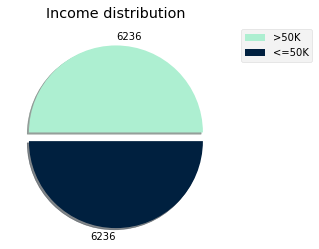

In [163]:
income = y_train_U.value_counts()
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=['>50K','<=50K'],bbox_to_anchor=(1.05, 1))

In [228]:
oversample = ADASYN(random_state=45)
X_train_A, y_train_A = oversample.fit_resample(X_train, y_train)
y_train_A.value_counts()

income
1         20128
0         19793
dtype: int64

In [118]:
#exp1 LogisticRegression with dommy with SMOTE
lg_dummy=LogisticRegression(max_iter=1000)
lg_dummy.fit(X_train_S,y_train_S)
model_eval(lg_dummy,X_train_S,y_train_S,"Logistic Regression Train",beta=1)
model_eval(lg_dummy,X_test,y_test,"Logistic Regression Test",beta=1)


C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


___________________Logistic Regression Train Metrics________________
Accuarcy score: 0.6200929621583388
Precision score 0.8183766407714974
Recall score 0.30869499317940685
F1 score 0.44829230712792106
___________________Logistic Regression Test Metrics________________
Accuarcy score: 0.7765826674861709
Precision score 0.5821389195148843
Recall score 0.32938240798502805
F1 score 0.42071713147410356


In [119]:
#planace data by RandomUnderSample
lg_dummy=LogisticRegression(max_iter=1000)
lg_dummy.fit(X_train_U,y_train_U)
model_eval(lg_dummy,X_train_U,y_train_U,"Logistic Regression Train",beta=1)
model_eval(lg_dummy,X_test,y_test,"Logistic Regression Test",beta=1)

___________________Logistic Regression Train Metrics________________
Accuarcy score: 0.6201090442591405
Precision score 0.638652350981118
Recall score 0.5532392559332906
F1 score 0.5928853754940713
___________________Logistic Regression Test Metrics________________
Accuarcy score: 0.6402888752304856
Precision score 0.3541501976284585
Recall score 0.5589519650655022
F1 score 0.4335833534962497


C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [120]:
#planace data by RandomOverSampler
lg_dummy=LogisticRegression(max_iter=1000)
lg_dummy.fit(X_train_R,y_train_R)
model_eval(lg_dummy,X_train_R,y_train_R,"Logistic Regression Train",beta=1)
model_eval(lg_dummy,X_test,y_test,"Logistic Regression Test",beta=1)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


___________________Logistic Regression Train Metrics________________
Accuarcy score: 0.6225433233971606
Precision score 0.6442633676321894
Recall score 0.5472641843075835
F1 score 0.5918155493634925
___________________Logistic Regression Test Metrics________________
Accuarcy score: 0.645359557467732
Precision score 0.35547355473554737
Recall score 0.5408608858390518
F1 score 0.4289955467590301


In [121]:
#exp2 StandardScaler 
std_scale=StandardScaler()
X_train_scaled=std_scale.fit_transform(X_train_R)

X_test_scaled=std_scale.fit_transform(X_test)

lg_std = LogisticRegression()
lg_std.fit(X_train_scaled, y_train_R)
model_eval(lg_std,X_train_scaled,y_train_R,"StandardScaler Train",beta=1)
model_eval(lg_std,X_test_scaled,y_test,"StandardScaler Test",beta=1)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


___________________StandardScaler Train Metrics________________
Accuarcy score: 0.8282978830899813
Precision score 0.812193715768233
Recall score 0.8540898297377861
F1 score 0.8326150663678678
___________________StandardScaler Test Metrics________________
Accuarcy score: 0.7258758451137062
Precision score 0.47147809643870153
Recall score 0.9332501559575795
F1 score 0.6264656616415409


In [122]:
#exp3 MinMaxScaler
mm_std=MinMaxScaler()
X_train_mm = mm_std.fit_transform(X_train_R)
X_test_mm = mm_std.fit_transform(X_test)

lg_mm = LogisticRegression()
lg_mm.fit(X_train_mm, y_train_R)
model_eval(lg_mm,X_train_mm,y_train_R,"MinMaxScaler Train",beta=1)
model_eval(lg_mm,X_test_mm,y_test,"MinMaxScaler Test",beta=1)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


___________________MinMaxScaler Train Metrics________________
Accuarcy score: 0.8252665083615419
Precision score 0.8082447572536627
Recall score 0.8528772798464104
F1 score 0.8299614051476192
___________________MinMaxScaler Test Metrics________________
Accuarcy score: 0.8076213890596189
Precision score 0.5735849056603773
Recall score 0.8533998752339363
F1 score 0.6860581745235708


C:\Users\abdol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#RandomizedSearchCV for LogisticRegression
ROS=RandomOverSampler(random_state=45)
Logistic_regression = Pipeline([("ROS", ROS), ("lg", LogisticRegression(max_iter=700))])
n_pos=np.sum(y_train==1)
n_neg=np.sum(y_train==0)

ratio=[{1:(n_pos*2),0:n_neg},
      {1:(n_pos*3),0:n_neg}]

param=dict(lg__l1_ratio=ratio )
gd_cv= RandomizedSearchCV(Logistic_regression,param,n_jobs=-1,cv=10)
gd_cv.fit(X_train,y_train)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('ROS',
                                              RandomOverSampler(random_state=45)),
                                             ('lg',
                                              LogisticRegression(max_iter=700))]),
                   n_jobs=-1,
                   param_distributions={'lg__l1_ratio': [{0: income    19793
dtype: int64,
                                                          1: income    12472
dtype: int64},
                                                         {0: income    19793
dtype: int64,
                                                          1: income    18708
dtype: int64}]})

In [38]:
tune_lr_ROS=gd_cv.best_estimator_

In [123]:
model_eval(tune_lr_ROS,X_train,y_train,"Tuning Logistic Regression Train",beta=1)
model_eval(tune_lr_ROS,X_test,y_test,"Tuning Logistic Regression Test",beta=1)

___________________Tuning Logistic Regression Train Metrics________________
Accuarcy score: 0.6604940643128818
Precision score 0.36107253498557845
Recall score 0.5420141116100065
F1 score 0.43341668269539013
___________________Tuning Logistic Regression Test Metrics________________
Accuarcy score: 0.645359557467732
Precision score 0.35547355473554737
Recall score 0.5408608858390518
F1 score 0.4289955467590301


In [40]:
#RandomizedSearchCV to tune best ratio to palance by RandomUnderSampler
RUS=RandomUnderSampler(random_state=45)
pipeline = Pipeline([("RUS", RUS), ("lg", LogisticRegression(max_iter=700))])
n_pos=np.sum(y_train==1)
n_neg=np.sum(y_train==0)

ratio=[{1:n_pos,0:int(n_neg/2)},
      {1:n_pos,0:int(n_neg/3)}]

param=dict(lg__l1_ratio=ratio )
gd_cv= RandomizedSearchCV(pipeline,param,n_jobs=-1,cv=10)
gd_cv.fit(X_train,y_train)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('RUS',
                                              RandomUnderSampler(random_state=45)),
                                             ('lg',
                                              LogisticRegression(max_iter=700))]),
                   n_jobs=-1,
                   param_distributions={'lg__l1_ratio': [{0: 9896,
                                                          1: income    6236
dtype: int64},
                                                         {0: 6597,
                                                          1: income    6236
dtype: int64}]})

In [41]:
#RandomizedSearchCV to tune best  parameter for LogisticRegression
RUS=RandomUnderSampler(replacement=2,random_state=45)
pipeline = Pipeline([("RUS", RUS ), ("lg", LogisticRegression(max_iter=700))])

param={"lg__penalty":['l1','l2'],
      'lg__C':[6.0,6.3,6.4,6.5,6.8]}
gd_cv= RandomizedSearchCV(pipeline,param,n_jobs=-1,cv=10)
gd_cv.fit(X_train,y_train)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.71969486        nan 0.71969486        nan 0.72718909
        nan 0.71969486        nan 0.71969486]
  warnings.warn(
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('RUS',
                                              RandomUnderSampler(random_state=45,
                                                                 replacement=2)),
                                             ('lg',
                                              LogisticRegression(max_iter=700))]),
                   n_jobs=-1,
                   param_distributions={'lg__C': [6.0, 6.3, 6.4, 6.5, 6.8],
                                        'lg__penalty': ['l1', 'l2']})

In [42]:
tune_lr_RUS=gd_cv.best_estimator_

In [124]:
model_eval(tune_lr_RUS,X_train,y_train,"Tuning lr Train",beta=1)
model_eval(tune_lr_RUS,X_test,y_test,"Tuning lr Test",beta=1)

___________________Tuning lr Train Metrics________________
Accuarcy score: 0.6536939567405586
Precision score 0.356478611283323
Recall score 0.5532392559332906
F1 score 0.43358049516149305
___________________Tuning lr Test Metrics________________
Accuarcy score: 0.6402888752304856
Precision score 0.3541501976284585
Recall score 0.5589519650655022
F1 score 0.4335833534962497


In [44]:
#exp4 decision tree 
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_U,y_train_U)
model_eval(decisiontree,X_train_U,y_train_U,"Decision Tree Train",beta=1)
model_eval(decisiontree,X_test,y_test,"Decision Tree Test",beta=1)

___________________Train Metrics________________
Accuarcy score: 0.9999198203976908
Precision score 1.0
Recall score 0.9998396407953817
F1 score 0.9999198139684067
___________________Test Metrics________________
Accuarcy score: 0.7584511370620775
Precision score 0.5060999606454152
Recall score 0.8022457891453525
F1 score 0.6206563706563707


In [45]:
#RandomizedSearchCV to tune best  parameter for decision tree
RUS=RandomUnderSampler(random_state=45,replacement=2)
pipeline = Pipeline([("RUS", RandomUnderSampler()), ("dt", DecisionTreeClassifier())])

param={'dt__max_depth':[8,9,10],'dt__min_samples_split':[2,3,5,9],
                                      'dt__criterion':["gini","entropy"]}
gs= RandomizedSearchCV(pipeline,param,n_jobs=-1,cv=10)
gs.fit(X_train,y_train)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('RUS', RandomUnderSampler()),
                                             ('dt', DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__max_depth': [8, 9, 10],
                                        'dt__min_samples_split': [2, 3, 5, 9]})

In [46]:
gs.best_score_

0.7780938330779568

In [47]:
gs.best_params_

{'dt__min_samples_split': 5, 'dt__max_depth': 10, 'dt__criterion': 'entropy'}

In [48]:
tune_dt=gs.best_estimator_

In [126]:
model_eval(tune_dt,X_train,y_train,"Tuning Decision Tree Train",beta=1)
model_eval(tune_dt,X_test,y_test,"Tuning Decision Tree Test",beta=1)

___________________Tuning Decision Tree Train Metrics________________
Accuarcy score: 0.7968804026278382
Precision score 0.5475308023640189
Recall score 0.8765234124438743
F1 score 0.6740242924964548
___________________Tuning Decision Tree Test Metrics________________
Accuarcy score: 0.781499692685925
Precision score 0.5355878883208809
Recall score 0.8496568933250156
F1 score 0.6570188133140377


In [125]:
#exp5 random forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train_U,y_train_U)
model_eval(randomforest,X_train_U,y_train_U,"Random Forest Train",beta=1)
model_eval(randomforest,X_test,y_test,"Random Forest Test",beta=1)

<ipython-input-125-9583f875a27f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train_U,y_train_U)


___________________Random Forest Train Metrics________________
Accuarcy score: 0.9999198203976908
Precision score 0.9998396665063332
Recall score 1.0
F1 score 0.999919826825944
___________________Random Forest Test Metrics________________
Accuarcy score: 0.7924093423478795
Precision score 0.5509708737864077
Recall score 0.8496568933250156
F1 score 0.6684662576687117


In [51]:
#RandomizedSearchCV to tune best  parameter for randomforest
RUS=RandomUnderSampler(random_state=45,replacement=2)
pipeline = Pipeline([("RUS", RandomUnderSampler()), ("rf", RandomForestClassifier())])

param={'rf__n_estimators': [80,85,90,95,100],'rf__max_depth':[10 ,15, 20],'rf__min_samples_split':[9,10,11,20],
        'rf__criterion':["gini","entropy"] ,'rf__max_features':['auto','sqrt',"log2"]}
gs1= RandomizedSearchCV(pipeline,param,n_jobs=-1,cv=10)
gs1.fit(X_train,y_train)

C:\Users\abdol\anaconda3\lib\site-packages\imblearn\pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('RUS', RandomUnderSampler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': [10, 15, 20],
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__min_samples_split': [9, 10, 11,
                                                                  20],
                                        'rf__n_estimators': [80, 85, 90, 95,
                                                             100]})

In [52]:
gs1.best_score_

0.804256869106568

In [53]:
gs1.best_params_

{'rf__n_estimators': 85,
 'rf__min_samples_split': 10,
 'rf__max_features': 'auto',
 'rf__max_depth': 20,
 'rf__criterion': 'gini'}

In [54]:
tune_rf=gs1.best_estimator_

In [127]:
model_eval(tune_rf,X_train,y_train,"Tuning Random Forest Train",beta=1)
model_eval(tune_rf,X_test,y_test,"Tuning Random Forest Test",beta=1)

___________________Tuning Random Forest Train Metrics________________
Accuarcy score: 0.830880940489454
Precision score 0.5927386731391586
Recall score 0.9398652982681206
F1 score 0.7269908211361945
___________________Tuning Random Forest Test Metrics________________
Accuarcy score: 0.7997848801475107
Precision score 0.5592885375494071
Recall score 0.8827199001871491
F1 score 0.6847326397290103


In [114]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
model_eval(knn,X_train_U,y_train_U,"Knn Train",beta=1)
model_eval(knn,X_test,y_test,"Knn Test",beta=1)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


___________________Knn Train Metrics________________
Accuarcy score: 0.703976908274535
Precision score 0.9111182934712346
Recall score 0.45205259781911483
F1 score 0.6042872454448017
___________________Knn Test Metrics________________
Accuarcy score: 0.772280270436386
Precision score 0.5641569459172853
Recall score 0.3318777292576419
F1 score 0.41791044776119407


In [56]:
# exp6 RandomizedSearchCV to tune best  parameter for KNeighbors
RUS=RandomUnderSampler(random_state=45,replacement=2)
pipeline = Pipeline([("RUS", RandomUnderSampler()), ("knn", KNeighborsClassifier())])
param={'knn__n_neighbors': [11,15,20,25,30]}
gs1= RandomizedSearchCV(pipeline,param,n_jobs=-1,cv=10)
gs1.fit(X_train,y_train)


C:\Users\abdol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('RUS', RandomUnderSampler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'knn__n_neighbors': [11, 15, 20, 25,
                                                             30]})

In [57]:
gs1.best_score_

0.7050206215674398

In [58]:
tune_knn=gs1.best_estimator_
tune_knn

Pipeline(steps=[('RUS', RandomUnderSampler()),
                ('knn', KNeighborsClassifier(n_neighbors=30))])

In [115]:
model_eval(tune_knn,X_train,y_train,"Tuning Knn Train",beta=1)
model_eval(tune_knn,X_test,y_test,"Tuning Knn Test",beta=1)

___________________Tuning Knn Train Metrics________________
Accuarcy score: 0.725844250643513
Precision score 0.4288874841972187
Recall score 0.43521488133418856
F1 score 0.43202801655523715
___________________Tuning Knn Test Metrics________________
Accuarcy score: 0.7005224339274739
Precision score 0.3933415536374846
Recall score 0.39800374298190894
F1 score 0.3956589147286822


In [60]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                    
                       )

eval_set=[(X_train_U,y_train_U),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train_U, y_train_U, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

C:\Users\abdol\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\abdol\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.8268285187461586

In [128]:
model_eval(gbm,X_train_U,y_train_U,"XGB Train",beta=1)
model_eval(gbm,X_test,y_test,"XGB Test",beta=1)

___________________XGB Train Metrics________________
Accuarcy score: 0.8684252726106478
Precision score 0.8485813988772569
Recall score 0.8968890314304041
F1 score 0.8720667342324784
___________________XGB Test Metrics________________
Accuarcy score: 0.8268285187461586
Precision score 0.6020583190394511
Recall score 0.875857766687461
F1 score 0.7135959339263023


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

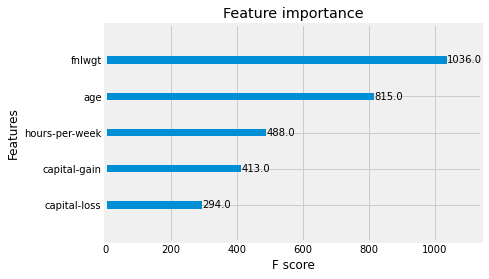

In [251]:
xgb.plot_importance(gbm, importance_type='weight',max_num_features=5)

In [61]:
RUS=RandomUnderSampler(random_state=45,replacement=2)
pipeline = Pipeline([("RUS", RandomUnderSampler()), 
                     ("XGB", xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic'))])
params = {
        'XGB__min_child_weight': [1, 5, 10],
        'XGB__gamma': [0.5, 1, 1.5, 2, 5],
        'XGB__subsample': [0.6, 0.8, 1.0],
        'XGB__colsample_bytree': [0.6, 0.8, 1.0],
        'XGB__max_depth': [3, 4, 5]
        }
param_comb = 70

random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=10, verbose=3, random_state=42)

random_search.fit(X_train, y_train) 

Fitting 10 folds for each of 70 candidates, totalling 700 fits


C:\Users\abdol\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:05:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('RUS', RandomUnderSampler()),
                                             ('XGB',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            enable_categorical=False,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type=None,
                                                            interaction_constraints=None,
                                         

In [62]:
tune_xgb=random_search.best_estimator_

In [130]:
model_eval(tune_xgb,X_train,y_train,"Tuning XGB Train",beta=1)
model_eval(tune_xgb,X_test,y_test,"Tuning XGB Test",beta=1)

___________________Tuning XGB Train Metrics________________
Accuarcy score: 0.8329939682661647
Precision score 0.6020750027018265
Recall score 0.8933611289288005
F1 score 0.7193492155723415
___________________Tuning XGB Test Metrics________________
Accuarcy score: 0.8291333743085433
Precision score 0.6055006446067899
Recall score 0.8789769182782283
F1 score 0.7170483460559796


In [131]:
model_names = ["tune_lr_RUS", "tune_dt", "tune_rf",'tune_knn','tune_xgb']

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [132]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} train score: {curr_model.score(X_train, y_train)}')
    print(f'{model_name} test score: {curr_model.score(X_test, y_test)}')

tune_lr_RUS train score: 0.6536939567405586
tune_lr_RUS test score: 0.6402888752304856
tune_dt train score: 0.7968804026278382
tune_dt test score: 0.781499692685925
tune_rf train score: 0.830880940489454
tune_rf test score: 0.7997848801475107
tune_knn train score: 0.725844250643513
tune_knn test score: 0.7005224339274739
tune_xgb train score: 0.8329939682661647
tune_xgb test score: 0.8291333743085433


<h2 style="color:#73C6B6;">Voting </h2>

In [133]:

voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train_U, y_train_U)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('tune_lr_RUS',
                              Pipeline(steps=[('RUS',
                                               RandomUnderSampler(random_state=45,
                                                                  replacement=2)),
                                              ('lg',
                                               LogisticRegression(C=6.4,
                                                                  max_iter=700))])),
                             ('tune_dt',
                              Pipeline(steps=[('RUS', RandomUnderSampler()),
                                              ('dt',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=10,
                                                                      min_samples_split=5))])),
                             ('tune_rf',
                              Pipeline(st

In [134]:
model_eval(voting_classifer,X_train_U,y_train_U,"voting_classifer(hard)Train",beta=1)
model_eval(voting_classifer,X_test,y_test,"voting_classifer(hard)Test",beta=1)

___________________voting_classifer(hard)Train Metrics________________
Accuarcy score: 0.8665009621552278
Precision score 0.8453982167145232
Recall score 0.8970493906350224
F1 score 0.870458258772271
___________________voting_classifer(hard)Test Metrics________________
Accuarcy score: 0.803779963122311
Precision score 0.5664221678891606
Recall score 0.8671241422333126
F1 score 0.6852353956125216


In [135]:
voting_classifer1 = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                n_jobs=-1)
voting_classifer1.fit(X_train_U, y_train_U)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('tune_lr_RUS',
                              Pipeline(steps=[('RUS',
                                               RandomUnderSampler(random_state=45,
                                                                  replacement=2)),
                                              ('lg',
                                               LogisticRegression(C=6.4,
                                                                  max_iter=700))])),
                             ('tune_dt',
                              Pipeline(steps=[('RUS', RandomUnderSampler()),
                                              ('dt',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=10,
                                                                      min_samples_split=5))])),
                             ('tune_rf',
                              Pipeline(st

In [136]:
model_eval(voting_classifer1,X_train_U,y_train_U,"voting_classifer(soft)Train",beta=1)
model_eval(voting_classifer1,X_test,y_test,"voting_classifer(soft)Test",beta=1)

___________________voting_classifer(soft)Train Metrics________________
Accuarcy score: 0.8738774855676715
Precision score 0.8564439688121083
Recall score 0.8983322642719692
F1 score 0.8768881584096423
___________________voting_classifer(soft)Test Metrics________________
Accuarcy score: 0.8117701290719115
Precision score 0.5790133779264214
Recall score 0.8640049906425452
F1 score 0.6933667083854819


<h2 style="color:#73C6B6;">Stacked </h2> 

In [137]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=RandomForestClassifier(), use_probas=False)

In [138]:
stacked.fit(X_train_U, y_train_U)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\abdol\anaconda3\lib\site-packages\imblearn\pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
C:\Users\abdol\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abdol\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[23:14:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abdol\anaconda3\lib\site-packages\mlxtend\classifier\stacking_classification.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.meta_clf_.fit(meta_features, y)


StackingClassifier(classifiers=[Pipeline(steps=[('RUS',
                                                 RandomUnderSampler(random_state=45,
                                                                    replacement=2)),
                                                ('lg',
                                                 LogisticRegression(C=6.4,
                                                                    max_iter=700))]),
                                Pipeline(steps=[('RUS', RandomUnderSampler()),
                                                ('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=10,
                                                                        min_samples_split=5))]),
                                Pipeline(steps=[('RUS', RandomUnderSampler()),
                                                ('rf',
              

In [139]:
model_eval(stacked,X_train_U,y_train_U,"stacked Train",beta=1)
model_eval(stacked,X_test,y_test,"stacked Test",beta=1)

___________________stacked Train Metrics________________
Accuarcy score: 0.8902341244387428
Precision score 0.8530393152473524
Recall score 0.9429121231558691
F1 score 0.8957270165282962
___________________stacked Test Metrics________________
Accuarcy score: 0.7939459127228027
Precision score 0.5512118842845973
Recall score 0.8796007485963818
F1 score 0.6777217015140591


ROC AUC score =  0.8678172234399949


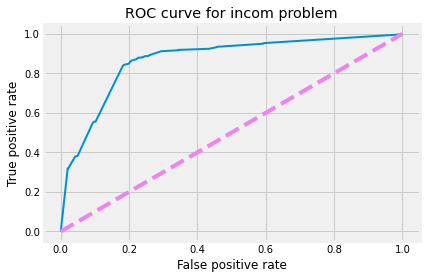

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, stacked.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for incom problem');
print("ROC AUC score = ", roc_auc_score(y_test, stacked.predict_proba(X_test)[:,1]))

In [143]:
model_names.append("voting_classifer1")
model_names

['tune_lr_RUS',
 'tune_dt',
 'tune_rf',
 'tune_knn',
 'tune_xgb',
 'voting_classifer1']

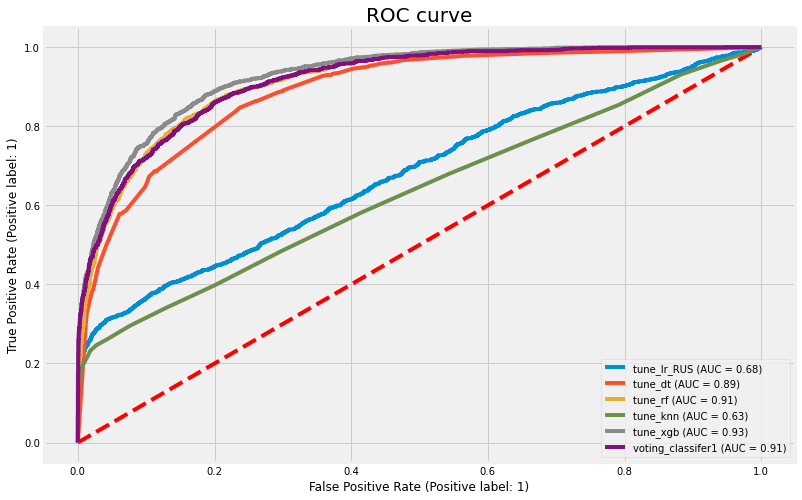

In [144]:
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'r--')
model_list = list(zip(model_names, model_vars))
ax = plt.gca()
for model_name in model_names:
    curr_model = eval(model_name)
    plot_roc_curve(curr_model, X_test, y_test, ax=ax, name=model_name )
    
    plt.title('ROC curve', size=20)

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


random forest Model best F1 score 0.741 at prob decision threshold >= 0.667


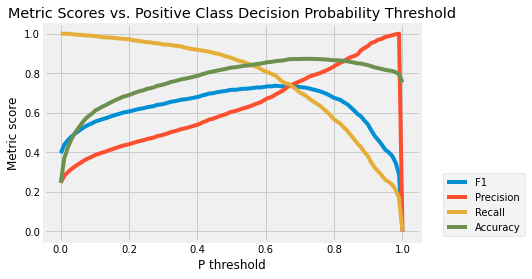

In [145]:
thresh_ps =np.linspace(0, 1, num=100)
model_test_probs = tune_xgb.predict_proba(X_test)[:,1]
f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f1_scores.append(f1_score(y_test, model_test_labels))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('random forest Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

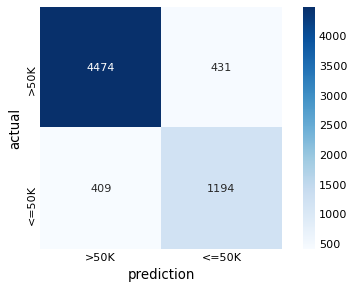

In [232]:
make_confusion_matrix(tune_xgb,X_test,y_test, threshold=0.667)

In [233]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold:make_confusion_matrix(tune_xgb,X_test,y_test, threshold) , threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…